IST 707 DATA ANALYTICS - ABHIRAJ SINGH 

Application Link: https://abhiraj-da-app.herokuapp.com/

In [ ]:
#Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

!pip install apyori

import apyori as ap
from apyori import apriori #Apriori Algorithm
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#Load the dataset

df = pd.read_csv('files.csv')
print(df.shape)
df.head(5)

(1176, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,4,Male,96,3,2.0,Sales Executive,3,Married,5301,2939,8,Y,No,15.0,3.0,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,4,Female,82,3,2.0,Laboratory Technician,3,Married,3149,21821,8,Y,No,20.0,4.0,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,3,Female,68,2,2.0,Sales Executive,3,Single,6244,7824,7,Y,No,17.0,3.0,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,4,Male,37,2,4.0,Healthcare Representative,2,Divorced,13577,25592,1,Y,Yes,15.0,3.0,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,4,Female,91,2,3.0,Healthcare Representative,2,Single,8606,21195,1,Y,No,19.0,3.0,4.0,80,0,11.0,3,1,11,8,3.0,3


In [ ]:
#Basic statistics of the features

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.960034,9.071964,18.0,30.00,36.0,43.00,60.0
DailyRate,1176.0,800.386905,404.709216,102.0,461.75,796.0,1162.00,1499.0
DistanceFromHome,1174.0,9.495741,10.251379,1.0,2.00,7.0,14.00,224.0
Education,1176.0,2.895408,1.025685,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1176.0,1036.430272,600.681874,1.0,499.75,1032.5,1574.50,2068.0
EnvironmentSatisfaction,1176.0,2.704932,1.094128,1.0,2.00,3.0,4.00,4.0
HourlyRate,1176.0,65.822279,20.292035,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1176.0,2.740646,0.719277,1.0,2.00,3.0,3.00,4.0
JobLevel,1175.0,2.068936,1.109590,1.0,1.00,2.0,3.00,5.0


**DATA PREPROCESSING**

**Data Quality Issues:**


1.   Data has few NAs
2.   Some attribute have negligible or 0 variance
3.   Some attributes are continous, So for assosiation rules we need to conver them to categorical 




We can remove the columns which show very less variance. We can see that the variance is low based on the maximum and minimum values of the attribute descreibed in the previous step. Columns with less variance are EmployeeCount, StandardHours. Also, remove the Over18 and EmployeeNumber as they are not very relevant to the problem statement.

In [ ]:
#remove the columns with no variance i.e. max(col) = min(col)

df = df.drop(['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1)
len(df.columns)

31

In [ ]:
#Check the type of the attributes 

dtyp = df.dtypes
lst_dtype=list(dtyp)
print(lst_dtype)

[dtype('int64'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64')]


Removal of NA values, for this specific dataset we can directly drop the NA values as we do not have many NA values.

In [ ]:
#Check for NA in the dataset

lst = df.columns

def na_check(x):
  for i in lst:
    return df.isnull().sum()
obj = na_check(lst)
print(obj)
print('**************************')
print('After removal of NA Values')
print('**************************')

#Removal of NA values from the columns
#Gender (because we cannot assume gender)
#we have very low NA values present so remove all

df = df.dropna(how = 'any')
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            2
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    1
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    1
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    1
StockOptionLevel            0
TotalWorkingYears           2
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     1
YearsWithCurrManager        0
dtype: int64
**************************
After removal of NA Values
***

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**DATA VISUALIZATION**

['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
The length of the list is: 16


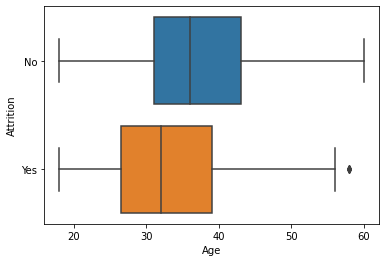

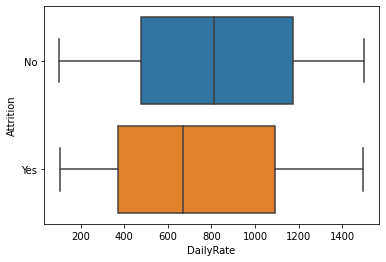

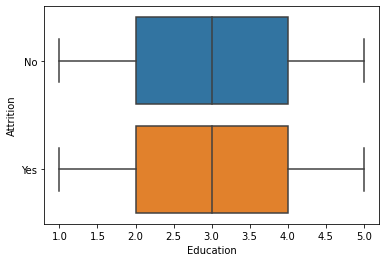

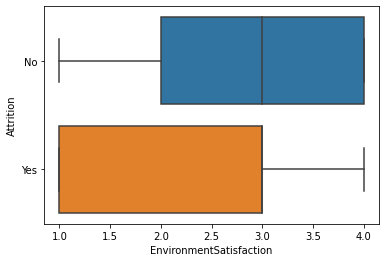

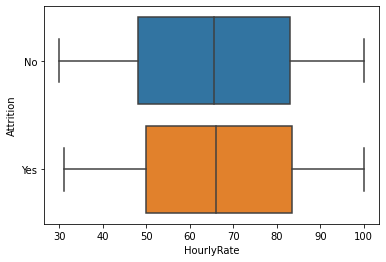

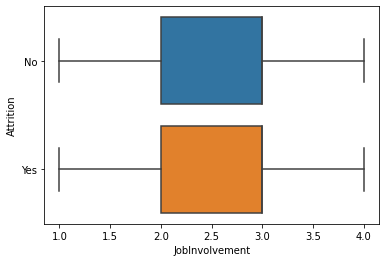

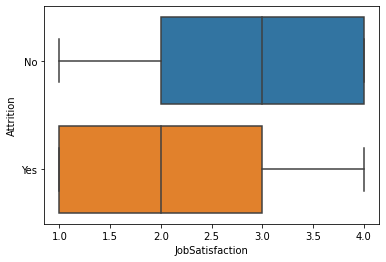

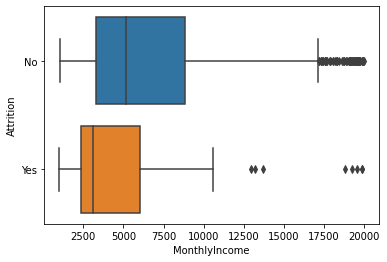

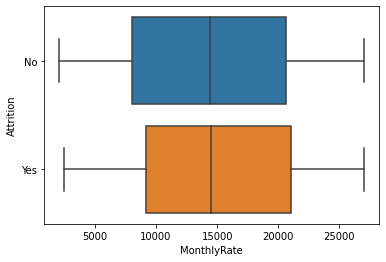

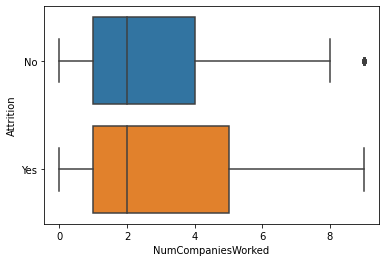

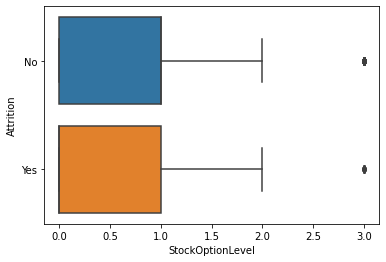

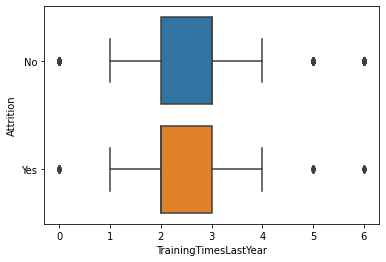

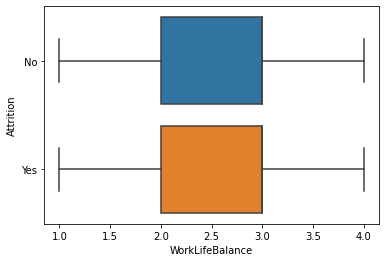

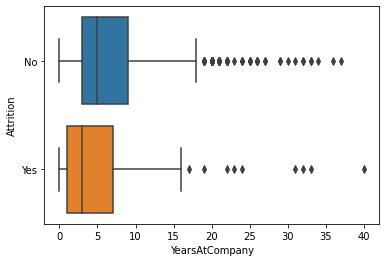

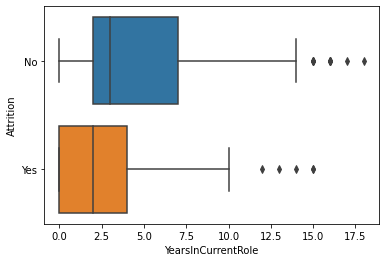

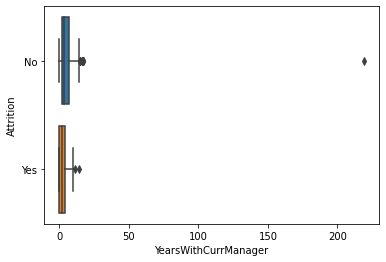

In [ ]:
#list of attributes which we can bin because they are continuos

lst = df.columns
lst_bin = [] 
def bin_list(x):
  for i in lst:
    if df[i].dtype == 'int64':
      lst_bin.append(i)
  return lst_bin

obj3 = bin_list(lst)  
print(lst_bin)
print("The length of the list is:",len(lst_bin))

def plot_scatter(x):
  for i in lst_bin:
    ax = sns.boxplot(x=df[i], y=df['Attrition'], data=df)
    plt.show()
obj4 = plot_scatter(lst_bin)
obj4

Based on the above boxplots we can determine **Variance** present in the feature when compared to the target variable.
The List of features which shows variance are:
1)Age
2)DailyRate
3)EnvironmentSatisfaction
4)JobSatisfaction
5)MonthlyIncome
6)MonthlyRate
7)NumCompaniesWorked
8)YearsAtCompany
9)YearsInCurrentRole
10)YearsWithCurrManager.
Other variables do not show much of the variance.



['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8


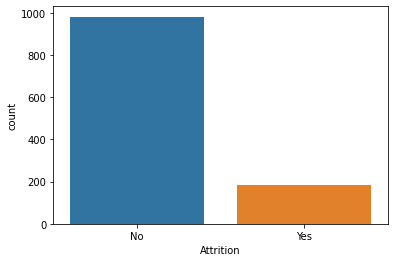

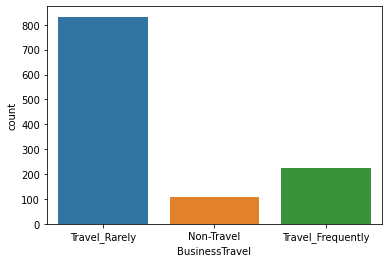

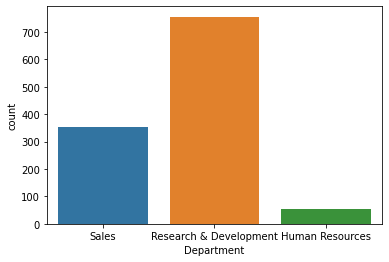

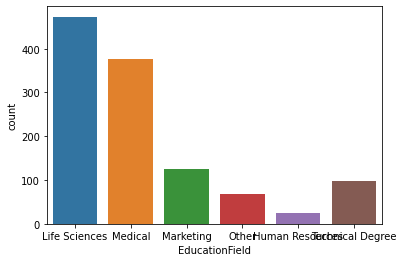

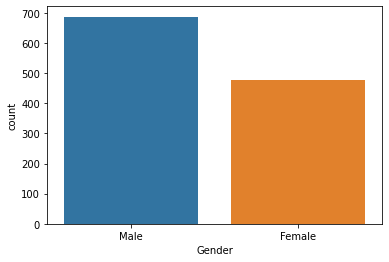

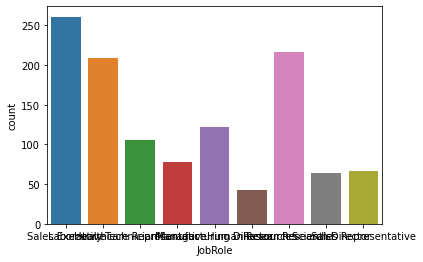

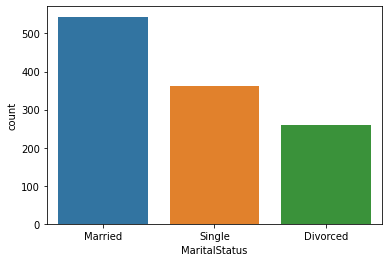

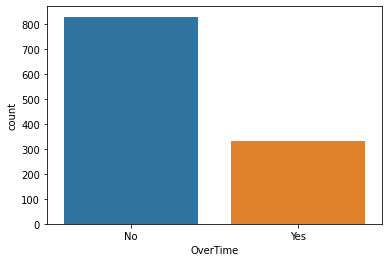

In [ ]:
#list of attributes which we need to bin
lst = df.columns
lst_bin = [] 
def bin_list(x):
  for i in lst:
    if df[i].dtype == 'object':
      lst_bin.append(i)
  return lst_bin

obj3 = bin_list(lst)  
print(lst_bin)
print(len(lst_bin))

def plot_scatter(x):
  for i in lst_bin:
    ax = sns.countplot(x=df[i], data=df)
    plt.show()
obj4 = plot_scatter(lst_bin)
obj4

 Based on the above figures we can analyze following key inferences:



1.   Employee who do not good amount monthly leave the company.
2.   Employee who work for less duration tend to leave the company sooner.
3.   Gender has no affect on attrition. 

### Converting continuous varibles to categorical using binning into 3 or 2 bins

In [ ]:
#Creating bins so that we can apply this to generate rules

lst_q_3 = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                      'NumCompaniesWorked','PercentSalaryHike',
               'TotalWorkingYears','TrainingTimesLastYear']


def create_bins(x):
  for i in lst_q_3:
    df[i+'_cut']=pd.qcut(df[i], q=3,labels=['Low','Med','High'])
  return df

obj5 = create_bins(df)
obj5

df = df.drop( ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                      'NumCompaniesWorked','PercentSalaryHike',
               'TotalWorkingYears','TrainingTimesLastYear'], axis=1)
len(df.columns)

31

In [ ]:
#Creating bins so that we can apply this to generate rules

lst_q_2 = ['YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager']

def create_bins(x):
  for i in lst_q_2:
    df[i+'_cut']=pd.qcut(df[i], q=2,labels=['Low','High'])
  return df

obj5 = create_bins(df)
obj5

df = df.drop(['YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager'], axis=1)
len(df.columns)

31

In [ ]:
#removal of the blank spaces 

df = df.astype('str')
df[df.columns] = df.apply(lambda x: x.str.strip())    
df = df.astype('object')
df_clean = pd.DataFrame({col: str(col)+'=' for col in df}, index=df.index) + df.astype(str)

In [ ]:
#Final data which will be used in generating association rules.

df_clean

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Age_cut,DailyRate_cut,DistanceFromHome_cut,HourlyRate_cut,MonthlyIncome_cut,MonthlyRate_cut,NumCompaniesWorked_cut,PercentSalaryHike_cut,TotalWorkingYears_cut,TrainingTimesLastYear_cut,YearsSinceLastPromotion_cut,YearsInCurrentRole_cut,YearsAtCompany_cut,YearsWithCurrManager_cut
0,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,Education=1,EducationField=Life Sciences,EnvironmentSatisfaction=4,Gender=Male,JobInvolvement=3,JobLevel=2.0,JobRole=Sales Executive,JobSatisfaction=3,MaritalStatus=Married,OverTime=No,PerformanceRating=3.0,RelationshipSatisfaction=3.0,StockOptionLevel=2,WorkLifeBalance=2,Age_cut=Low,DailyRate_cut=High,DistanceFromHome_cut=High,HourlyRate_cut=High,MonthlyIncome_cut=Med,MonthlyRate_cut=Low,NumCompaniesWorked_cut=High,PercentSalaryHike_cut=Med,TotalWorkingYears_cut=Low,TrainingTimesLastYear_cut=Low,YearsSinceLastPromotion_cut=High,YearsInCurrentRole_cut=Low,YearsAtCompany_cut=Low,YearsWithCurrManager_cut=Low
1,Attrition=No,BusinessTravel=Travel_Rarely,Department=Research & Development,Education=4,EducationField=Life Sciences,EnvironmentSatisfaction=4,Gender=Female,JobInvolvement=3,JobLevel=2.0,JobRole=Laboratory Technician,JobSatisfaction=3,MaritalStatus=Married,OverTime=No,PerformanceRating=4.0,RelationshipSatisfaction=2.0,StockOptionLevel=1,WorkLifeBalance=3,Age_cut=High,DailyRate_cut=High,DistanceFromHome_cut=High,HourlyRate_cut=High,MonthlyIncome_cut=Low,MonthlyRate_cut=High,NumCompaniesWorked_cut=High,PercentSalaryHike_cut=High,TotalWorkingYears_cut=Med,TrainingTimesLastYear_cut=Med,YearsSinceLastPromotion_cut=Low,YearsInCurrentRole_cut=Low,YearsAtCompany_cut=Low,YearsWithCurrManager_cut=High
2,Attrition=No,BusinessTravel=Travel_Rarely,Department=Sales,Education=2,EducationField=Medical,EnvironmentSatisfaction=3,Gender=Female,JobInvolvement=2,JobLevel=2.0,JobRole=Sales Executive,JobSatisfaction=3,MaritalStatus=Single,OverTime=No,PerformanceRating=3.0,RelationshipSatisfaction=1.0,StockOptionLevel=0,WorkLifeBalance=3,Age_cut=High,DailyRate_cut=Low,DistanceFromHome_cut=High,HourlyRate_cut=Med,MonthlyIncome_cut=Med,MonthlyRate_cut=Low,NumCompaniesWorked_cut=High,PercentSalaryHike_cut=Med,TotalWorkingYears_cut=Med,TrainingTimesLastYear_cut=High,YearsSinceLastPromotion_cut=Low,YearsInCurrentRole_cut=High,YearsAtCompany_cut=Low,YearsWithCurrManager_cut=Low
3,Attrition=No,BusinessTravel=Non-Travel,Department=Research & Development,Education=1,EducationField=Medical,EnvironmentSatisfaction=4,Gender=Male,JobInvolvement=2,JobLevel=4.0,JobRole=Healthcare Representative,JobSatisfaction=2,MaritalStatus=Divorced,OverTime=Yes,PerformanceRating=3.0,RelationshipSatisfaction=4.0,StockOptionLevel=1,WorkLifeBalance=3,Age_cut=High,DailyRate_cut=Low,DistanceFromHome_cut=Med,HourlyRate_cut=Low,MonthlyIncome_cut=High,MonthlyRate_cut=High,NumCompaniesWorked_cut=Low,PercentSalaryHike_cut=Med,TotalWorkingYears_cut=High,TrainingTimesLastYear_cut=Med,YearsSinceLastPromotion_cut=High,YearsInCurrentRole_cut=High,YearsAtCompany_cut=High,YearsWithCurrManager_cut=Low
4,Attrition=No,BusinessTravel=Travel_Rarely,Department=Research & Development,Education=3,EducationField=Life Sciences,EnvironmentSatisfaction=4,Gender=Female,JobInvolvement=2,JobLevel=3.0,JobRole=Healthcare Representative,JobSatisfaction=2,MaritalStatus=Single,OverTime=No,PerformanceRating=3.0,RelationshipSatisfaction=4.0,StockOptionLevel=0,WorkLifeBalance=1,Age_cut=Med,DailyRate_cut=Med,DistanceFromHome_cut=High,HourlyRate_cut=High,MonthlyIncome_cut=High,MonthlyRate_cut=High,NumCompaniesWorked_cut=Low,PercentSalaryHike_cut=High,TotalWorkingYears_cut=Med,TrainingTimesLastYear_cut=Med,YearsSinceLastPromotion_cut=High,YearsInCurrentRole_cut=High,YearsAtCompany_cut=High,YearsWithCurrManager_cut=Low
...,...,...,...,...,...,...,.

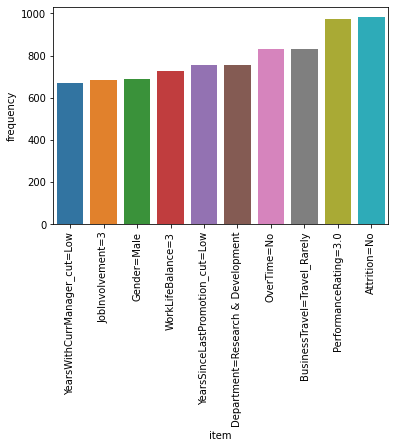

In [ ]:
#most occurring items 

melted_data = pd.melt(df_clean)
melted_data.head()
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=True)
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
g = sns.barplot(data=freq_itemset.tail(10), x='item', y='frequency')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
records = []
for i in range(0,len(df_clean)):
    records.append([str(df_clean.values[i,j]) 
    for j in range(0, len(df_clean.columns))])
frequent_itemset = ap.apriori(records, min_support=0.8, min_confidence=0.8,
                              min_lift=1,min_length=2)
results = list(frequent_itemset)
len(results)
results[1:5]

[RelationRecord(items=frozenset({'PerformanceRating=3.0'}), support=0.8369098712446352, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'PerformanceRating=3.0'}), confidence=0.8369098712446352, lift=1.0)])]

In [ ]:
records = []
for i in range(0,len(d1)):
    records.append([str(d1.values[i,j]) 
    for j in range(1, len(d1.columns))])
    
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)   
print(df)

      Age_cut=High  ...  YearsWithCurrManager_cut=Low
0            False  ...                          True
1             True  ...                         False
2             True  ...                          True
3             True  ...                          True
4            False  ...                          True
...            ...  ...                           ...
1160         False  ...                         False
1161         False  ...                          True
1162          True  ...                          True
1163         False  ...                          True
1164          True  ...                          True

[1165 rows x 104 columns]


In [ ]:
#import the dataframe to new CSV on google colab.

# from google.colab import files
# df.to_csv('df.csv') 
# files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True,max_len=4)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.842918,(Attrition=No)
1,0.714163,(BusinessTravel=Travel_Rarely)
2,0.648927,(Department=Research & Development)
3,0.406009,(EducationField=Life Sciences)
4,0.410300,(Gender=Female)
...,...,...
83,0.431760,"(OverTime=No, PerformanceRating=3.0, BusinessT..."
84,0.409442,"(YearsAtCompany_cut=Low, YearsInCurrentRole_cu..."
85,0.415451,"(YearsAtCompany_cut=Low, PerformanceRating=3.0..."
86,0.406867,"(YearsInCurrentRole_cut=Low, PerformanceRating..."


In [ ]:
#import the dataframe to new CSV on google colab.

# from google.colab import files
# df_clean.to_csv('df_final.csv') 
# files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ASSOCIATION RULE MINING**

In [ ]:
#Implementation of Association Rules Mining

te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False).head(10)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(BusinessTravel=Travel_Rarely),(Attrition=No),0.714163,0.842918,0.612876,0.858173,1.018097,0.010894,1.107558
3,(Department=Research & Development),(Attrition=No),0.648927,0.842918,0.566524,0.873016,1.035706,0.019531,1.237017
5,(JobInvolvement=3),(Attrition=No),0.588841,0.842918,0.506438,0.860058,1.020334,0.010093,1.122479
6,(OverTime=No),(Attrition=No),0.713305,0.842918,0.636910,0.892900,1.059296,0.035652,1.466683
8,(PerformanceRating=3.0),(Attrition=No),0.836910,0.842918,0.709013,0.847179,1.005055,0.003566,1.027883
9,(Attrition=No),(PerformanceRating=3.0),0.842918,0.836910,0.709013,0.841141,1.005055,0.003566,1.026631
11,(WorkLifeBalance=3),(Attrition=No),0.624034,0.842918,0.538197,0.862448,1.023169,0.012187,1.141983
15,(BusinessTravel=Travel_Rarely),(PerformanceRating=3.0),0.714163,0.836910,0.602575,0.843750,1.008173,0.004885,1.043777
17,"(PerformanceRating=3.0, BusinessTravel=Travel_...",(Attrition=No),0.602575,0.842918,0.518455,0.860399,1.020738,0.010533,1.125217
18,"(Attrition=No, BusinessTravel=Travel_Rarely)",(PerformanceRating=3.0),0.612876,0.836910,0.518455,0.845938,1.010788,0.005533,1.058603


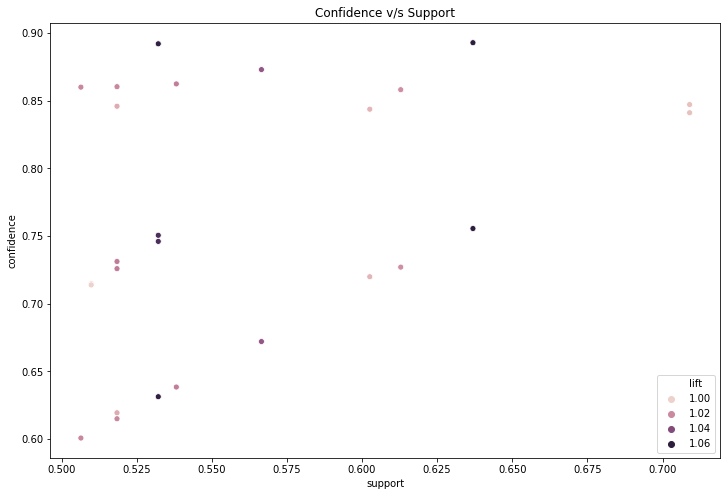

In [ ]:
#Scatterplot to show confidence and support 

plt.figure(figsize = (12,8))
plt.title('Confidence v/s Support')
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
plt.show()

In [ ]:


def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift, sort_by):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    sup_rules.sort_values(by=sort_by,ascending=False).head(5)
    return(sup_rules)

In [ ]:
#Generated top rules for the Attrition=No

SupervisedApriori(df,consequent = ['Attrition=No'],
min_supp=0.4, min_conf=0.7, min_lift=1,sort_by = 'lift').head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BusinessTravel=Travel_Rarely),(Attrition=No),0.714163,0.842918,0.612876,0.858173,1.018097,0.010894,1.107558
1,(Department=Research & Development),(Attrition=No),0.648927,0.842918,0.566524,0.873016,1.035706,0.019531,1.237017
2,(JobInvolvement=3),(Attrition=No),0.588841,0.842918,0.506438,0.860058,1.020334,0.010093,1.122479
3,(MaritalStatus=Married),(Attrition=No),0.466953,0.842918,0.410300,0.878676,1.042422,0.016697,1.294733
4,(OverTime=No),(Attrition=No),0.713305,0.842918,0.636910,0.892900,1.059296,0.035652,1.466683


Based on the above rules for attrition = no, we can say that people who travel rarely, are more into research, with good job involvement, no overtime and are married do not leave the company.

In [ ]:
#Generated top rules for the Attrition=Yes

SupervisedApriori(df,consequent = ['Attrition=Yes'],
min_supp=0.1, min_conf=0.2, min_lift=1,sort_by = 'lift').head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(StockOptionLevel=0),(Attrition=Yes),0.425751,0.157082,0.102146,0.239919,1.527355,0.035268,1.108986
1,(YearsAtCompany_cut=Low),(Attrition=Yes),0.541631,0.157082,0.109013,0.201268,1.281295,0.023933,1.055321
2,(YearsInCurrentRole_cut=Low),(Attrition=Yes),0.557940,0.157082,0.115021,0.206154,1.312400,0.027379,1.061816
3,"(YearsAtCompany_cut=Low, YearsInCurrentRole_cu...",(Attrition=Yes),0.488412,0.157082,0.104721,0.214411,1.364968,0.028001,1.072977
4,"(YearsAtCompany_cut=Low, YearsWithCurrManager_...",(Attrition=Yes),0.496137,0.157082,0.103863,0.209343,1.332700,0.025929,1.066098


Based on the above rules generated for attrition = yes, we can infer that employee who tend to spend less time with their company, have low time spent in their current role, have no stock options and have low years with current manager tend to leave the company. 